In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Ecommerce_UK.csv", encoding="ISO-8859-1")

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### 1. Basic EDA

#### <span style=color:red>e. Unique Values across all columns<span>

In [6]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

#### <span style=color:red>f. Duplicate values across all columns</span>

In [7]:
data.duplicated(subset=None,keep='first').value_counts()

False    536641
True       5268
dtype: int64

In [8]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [9]:
data['Date'] = data['InvoiceDate'].apply(lambda x: str(x).split(" "))

In [10]:
data[['date','hour']] = pd.DataFrame(data['Date'].tolist(), index = data.index)

In [11]:
data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00


In [12]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date                   object
hour                   object
dtype: object

In [13]:
data['date'] = pd.to_datetime(data['date'])

In [14]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date           datetime64[ns]
hour                   object
dtype: object

### 2. Check for missing values in all columns and replace them with the appropriate metric

<span style=color:red>**(Mean/Median/Mode)** </span>

In [15]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Date                0
date                0
hour                0
dtype: int64

### <span style=color:red>Categorical columns: ['Description', 'CustomerID']. So we cant replace them with (mean/median/mode).</span>

**The customerID is more likely unique key its datatype is float,we have to change it to object but we cant replce them with anything**

In [16]:
# that's why dropping null categorical variables
data.dropna(inplace=True)

In [17]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
date           0
hour           0
dtype: int64

In [18]:
data.shape

(406829, 11)

### 5. Add the columns - Month, Day and Hour for the invoice

In [19]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).dayofweek

In [20]:
data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2


In [21]:
new_data = data.drop(['Date'],axis=1)

In [22]:
new_data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2


### 3. Remove duplicate rows

In [23]:
new_data.drop_duplicates(subset=None, keep="first", inplace=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12:50:00,2011,12,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12:50:00,2011,12,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00,2011,12,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00,2011,12,4


### 4. Remove rows which have negative values in Quantity column

In [24]:
new_data = data[data.Quantity>=0]

In [25]:
new_data.shape

(397924, 14)

### 6. How many orders made by the customers?

In [26]:
cust_orders = new_data.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [27]:
cust_orders

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


### 7. TOP 5 customers with higher number of orders

In [28]:
top_customers = new_data.groupby('CustomerID')['InvoiceNo'].count().nlargest(5)

In [29]:
top_customers

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
Name: InvoiceNo, dtype: int64

In [30]:
cust_orders.sort_values(by = 'InvoiceNo',ascending=False).head()

,CustomerID,InvoiceNo
4011,17841.0,7847
1880,14911.0,5677
1290,14096.0,5111
326,12748.0,4596
1662,14606.0,2700


### 8. How much money spent by the customers?

In [31]:
new_data['revenue'] = new_data['UnitPrice']*new_data['Quantity']

<ipython-input-31-0ea82bb24c9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['revenue'] = new_data['UnitPrice']*new_data['Quantity']


In [32]:
money_spent = new_data.groupby('CustomerID')['revenue'].sum()
money_spent

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: revenue, Length: 4339, dtype: float64

### 9. TOP 5 customers with highest money spent

In [33]:
money_spent.sort_values(ascending = False).head()

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
Name: revenue, dtype: float64

### 10. How many orders per month?

In [34]:
monthwise_orders=new_data.groupby('Month')['InvoiceNo'].nunique().reset_index()

In [35]:
monthwise_orders

,Month,InvoiceNo
0,1,987
1,2,998
2,3,1321
3,4,1149
4,5,1555
5,6,1393
6,7,1331
7,8,1281
8,9,1756
9,10,1929


<IPython.core.display.Javascript object>

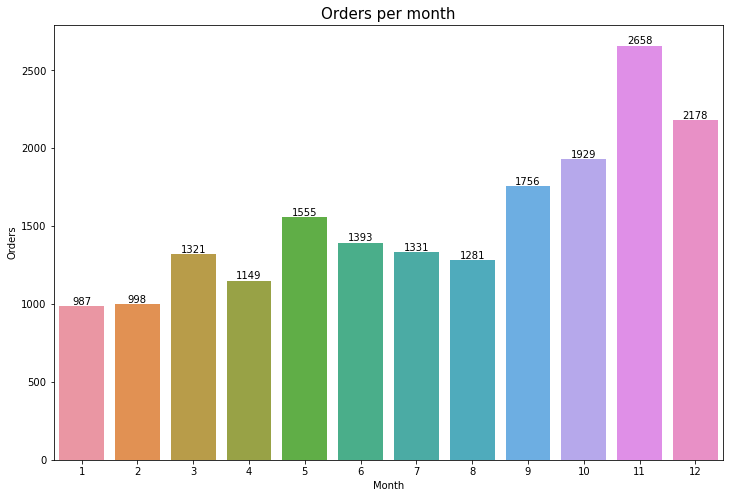

In [36]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Month',y='InvoiceNo',data=monthwise_orders)
ax.set_title('Orders per month',fontsize=15)
ax.set_ylabel('Orders',fontsize=10)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height+10,ha='center',s = '{:.0f}'.format(height))

### 11.How many orders per day?

In [37]:
daywise_orders = new_data.groupby('Day')['InvoiceNo'].nunique().reset_index()

In [38]:
daywise_orders

,Day,InvoiceNo
0,0,2863
1,1,3185
2,2,3455
3,3,4033
4,4,2831
5,6,2169


<IPython.core.display.Javascript object>

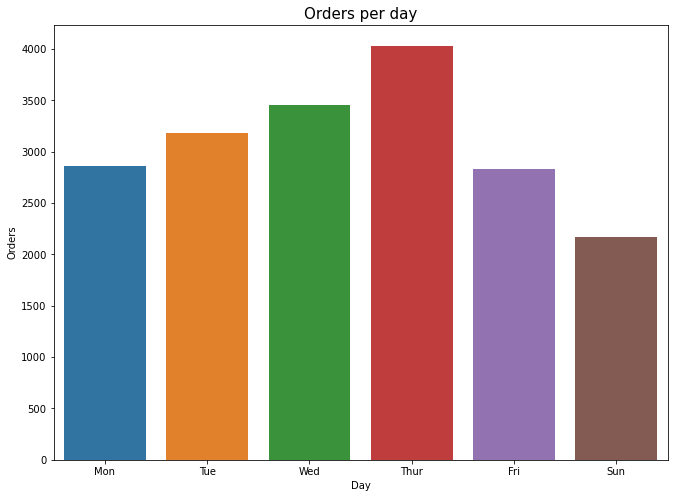

In [39]:
fig,axes = plt.subplots(figsize=(11,8))
ax = sns.barplot(x='Day',y='InvoiceNo',data=daywise_orders)
ax.set_title('Orders per day',fontsize=15)
ax.set_ylabel('Orders',fontsize=10)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=10)
plt.show()

### 12. How many orders per hour?

In [40]:
new_data.insert(loc=7, column='Hour', value=new_data.InvoiceDate.dt.hour)

In [41]:
hour_orders = new_data.groupby('Hour')['InvoiceNo'].nunique().reset_index()

In [42]:
hour_orders

,Hour,InvoiceNo
0,6,1
1,7,29
2,8,555
3,9,1394
4,10,2226
5,11,2277
6,12,3130
7,13,2637
8,14,2275
9,15,2038


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Orders')

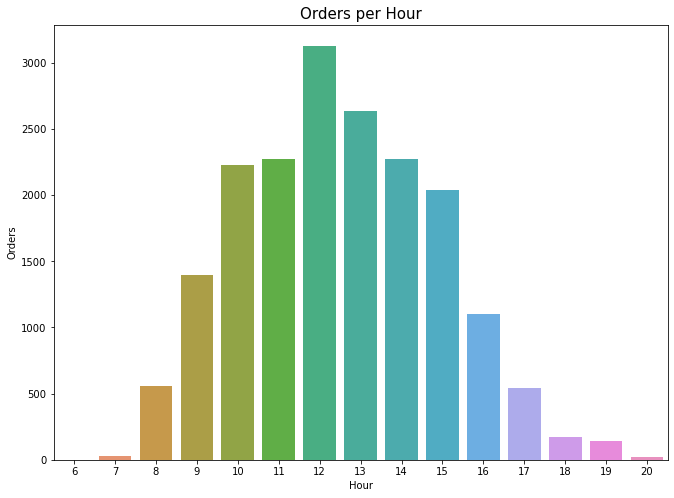

In [43]:
fig,axes = plt.subplots(figsize=(11,8))
ax = sns.barplot(x='Hour',y='InvoiceNo',data=hour_orders)
ax.set_title('Orders per Hour',fontsize=15)
ax.set_ylabel('Orders',fontsize=10)

### 13. How many orders for each country?

In [44]:
data.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


### 14. Orders trend across months

In [45]:
orders_trend= new_data.groupby('Month')['InvoiceNo'].count().reset_index()

In [46]:
orders_trend

,Month,InvoiceNo
0,1,21232
1,2,19928
2,3,27177
3,4,22644
4,5,28322
5,6,27185
6,7,26827
7,8,27013
8,9,40030
9,10,49557


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Orders')

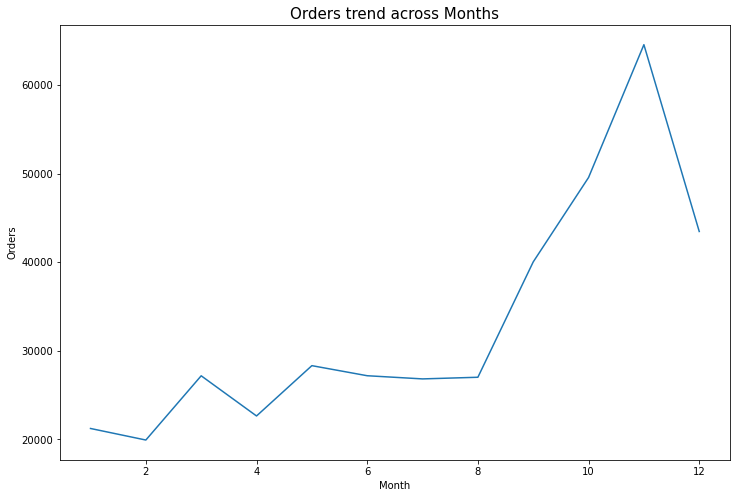

In [47]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x ='Month',y='InvoiceNo',data=orders_trend,sort=False)
ax.set_title('Orders trend across Months',fontsize=15)
ax.set_ylabel('Orders',fontsize=10)

### 15. How much money spent by each country?

In [48]:
money_spent_by_each_country = new_data.groupby('Country')['revenue'].sum().sort_values(ascending=False)

In [49]:
money_spent_by_each_country

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

# 1. Perform Basic EDA

#### <span style=color:red>a. Boxplot – All Numeric Variables<span> 

<IPython.core.display.Javascript object>

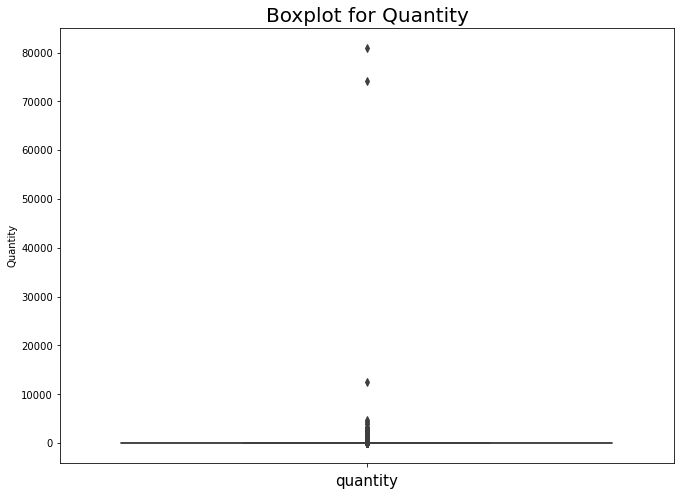

In [50]:
fig,axes = plt.subplots(figsize=(11,8))
sns.boxplot('Quantity',data=new_data,orient='v')
plt.xlabel('quantity',fontsize=15)
plt.title('Boxplot for Quantity',fontsize=20)
plt.show()

<IPython.core.display.Javascript object>

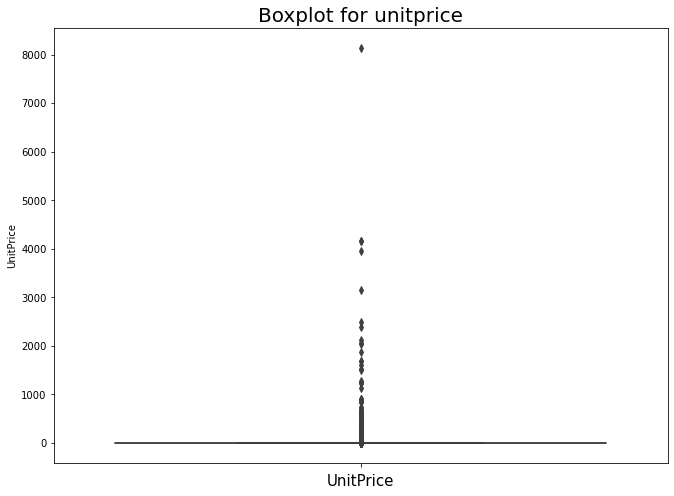

In [51]:
fig,axes = plt.subplots(figsize=(11,8))
sns.boxplot('UnitPrice',data=new_data,orient='v')
plt.xlabel('UnitPrice',fontsize=15)
plt.title('Boxplot for unitprice',fontsize=20)
plt.show()

#### <span style=color:red>b. Histogram – All Numeric Variables<span>

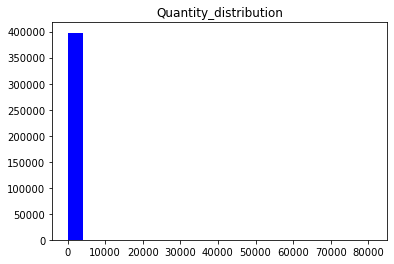

In [52]:
plt.hist(new_data['Quantity'], bins= 20, color='blue', alpha=1)
plt.title('Quantity_distribution')
plt.show()

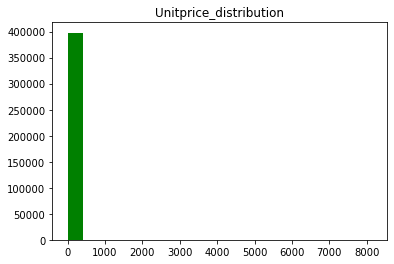

In [53]:
plt.hist(new_data['UnitPrice'], bins= 20, color='green', alpha=1)
plt.title('Unitprice_distribution')
plt.show()

#### <span style=color:red>c. Distribution Plot – All Numeric Variables<span>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

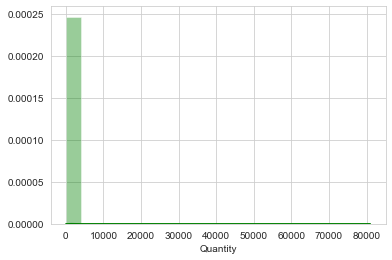

In [54]:
sns.set_style('whitegrid') 
sns.distplot(new_data['Quantity'] , color ='green', bins = 20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

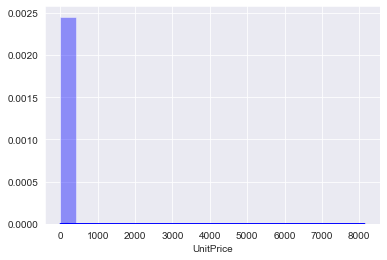

In [55]:
sns.set_style('darkgrid') 
sns.distplot(new_data['UnitPrice'] , color ='blue', bins = 20)

#### <span style=color:red>d. Aggregation for all numerical Columns<span>

In [56]:
new_data.aggregate({"Quantity":['min', 'mean', 'max', 'sum'],  
              "UnitPrice":['min', 'mean', 'max', 'sum'],  
              "revenue":['min', 'mean', 'max', 'sum']})

,Quantity,UnitPrice,revenue
min,1.000000e+00,0.000000e+00,0.000000e+00
mean,1.302182e+01,3.116174e+00,2.239475e+01
max,8.099500e+04,8.142750e+03,1.684696e+05
sum,5.181696e+06,1.240001e+06,8.911408e+06


#### <span style=color:red> g. Correlation – Heatmap - All Numeric Variables</span>

<IPython.core.display.Javascript object>

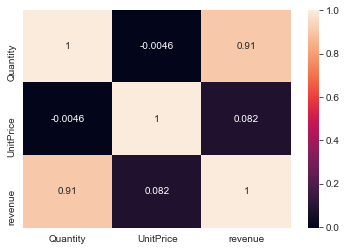

In [57]:
sns.heatmap(new_data[['Quantity','UnitPrice','revenue']].corr(),xticklabels='auto',yticklabels='auto',annot=True,fmt='.2g')

#### <span style=color:red>h. Regression Plot - All Numeric Variables</span>

<IPython.core.display.Javascript object>

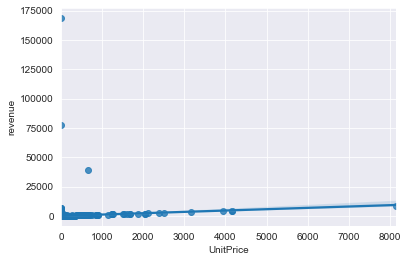

In [58]:
sns.regplot(x='UnitPrice',y='revenue',data=new_data)

<IPython.core.display.Javascript object>

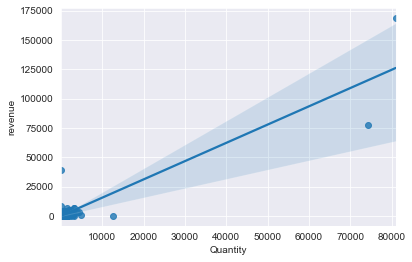

In [59]:
sns.regplot(x='Quantity',y='revenue',data=new_data)

<IPython.core.display.Javascript object>

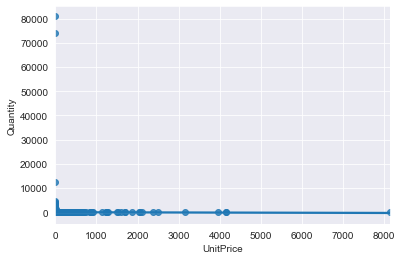

In [60]:
sns.regplot(x='UnitPrice',y='Quantity',data=new_data)

#### <span style=color:red>i. Bar Plot – Every Categorical Variable vs every Numerical Variable</span>

<IPython.core.display.Javascript object>

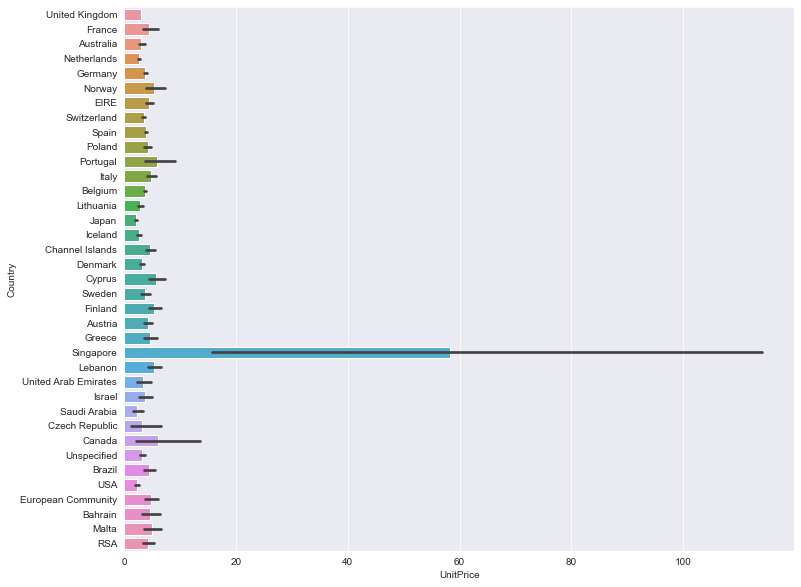

In [61]:
plt.figure(figsize=(12,10))
sns.barplot(x ='UnitPrice', y ='Country', data = new_data)

<IPython.core.display.Javascript object>

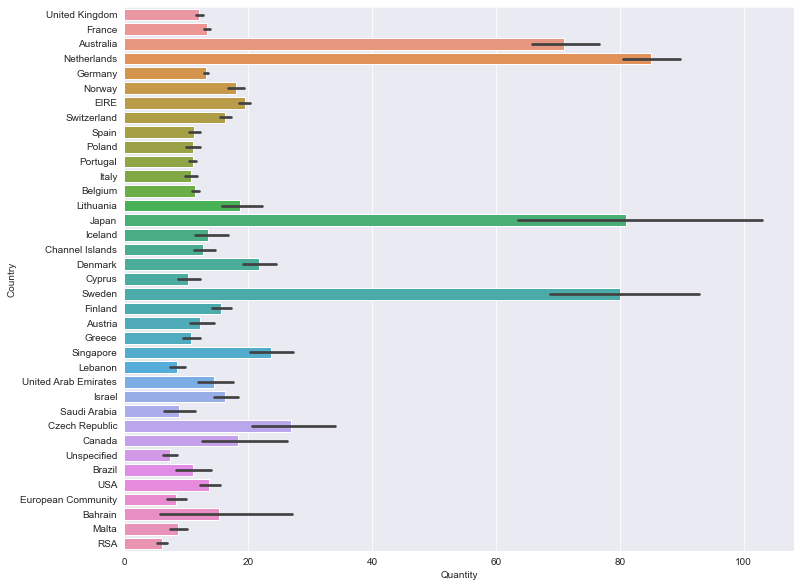

In [62]:
plt.figure(figsize=(12,10))
sns.barplot(x ='Quantity', y ='Country', data = new_data)

<IPython.core.display.Javascript object>

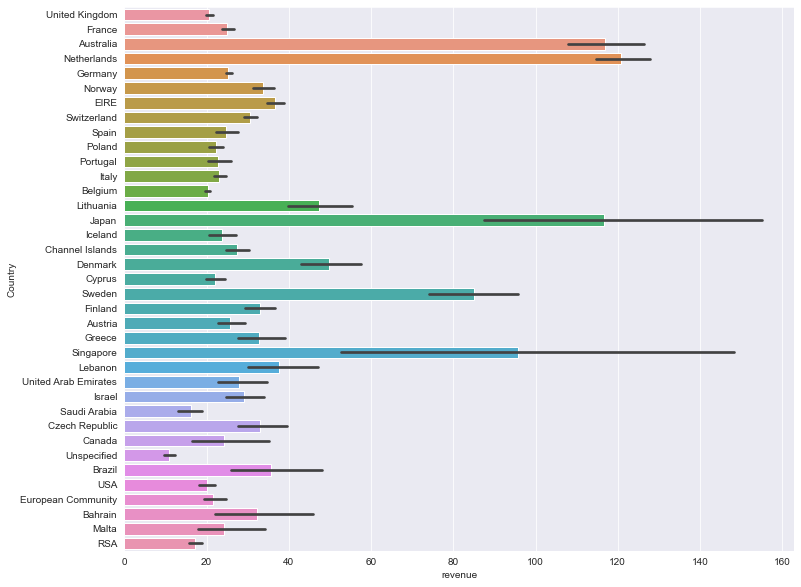

In [63]:
plt.figure(figsize=(12,10))
sns.barplot(x ='revenue', y ='Country', data = new_data)

#### <span style=color:red>j. Pair plot - All Numeric Variables</span>

<IPython.core.display.Javascript object>

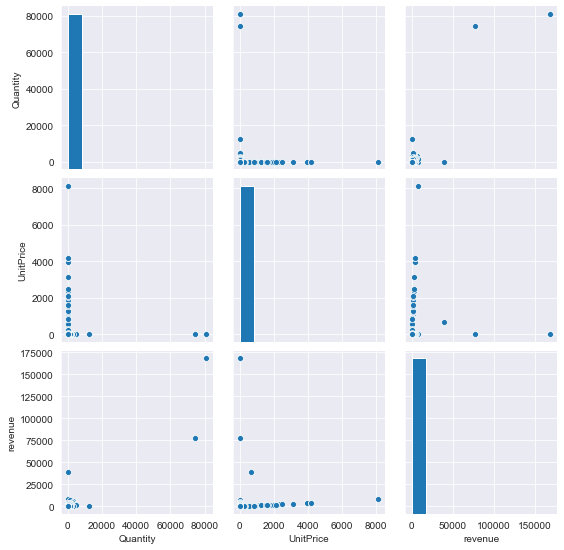

In [64]:
sns.pairplot(data=new_data[['Quantity','UnitPrice','revenue']])

#### <span style=color:red>k. Line chart to show the trend of data - All Numeric/Date Variables</span>

In [65]:
monthly_quantities = new_data.groupby('Month')['Quantity'].sum().reset_index()

In [66]:
monthly_quantities

,Month,Quantity
0,1,349147
1,2,265638
2,3,348544
3,4,292225
4,5,373685
5,6,363699
6,7,369432
7,8,398938
8,9,544899
9,10,593908


<IPython.core.display.Javascript object>

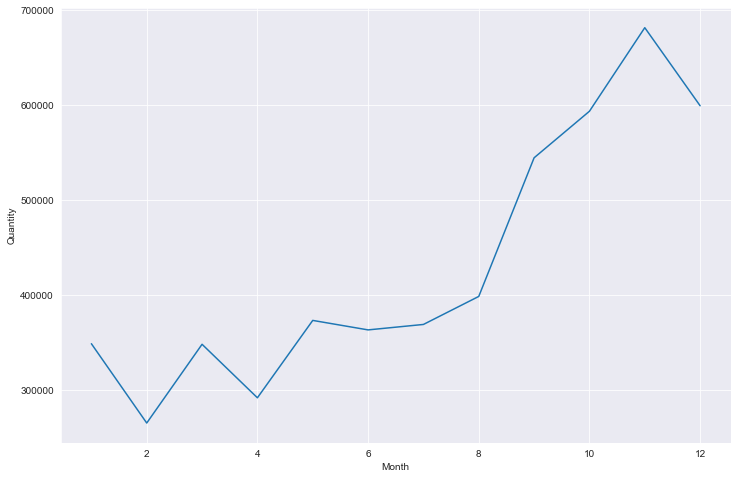

In [67]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x='Month',y='Quantity',data=monthly_quantities,sort=False)

In [68]:
monthly_revenue = new_data.groupby('Month')['revenue'].sum().reset_index()

<IPython.core.display.Javascript object>

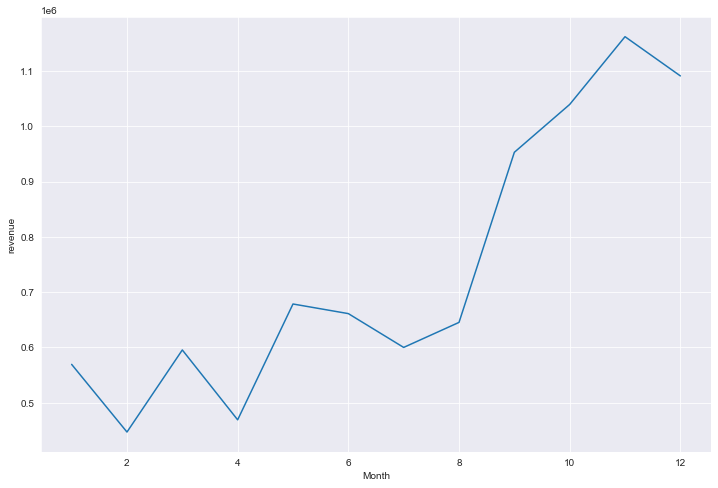

In [69]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x ='Month',y='revenue',data=monthly_revenue,sort=False)

In [70]:
weekly_sales = new_data.groupby('Day')['revenue'].sum().reset_index()

<IPython.core.display.Javascript object>

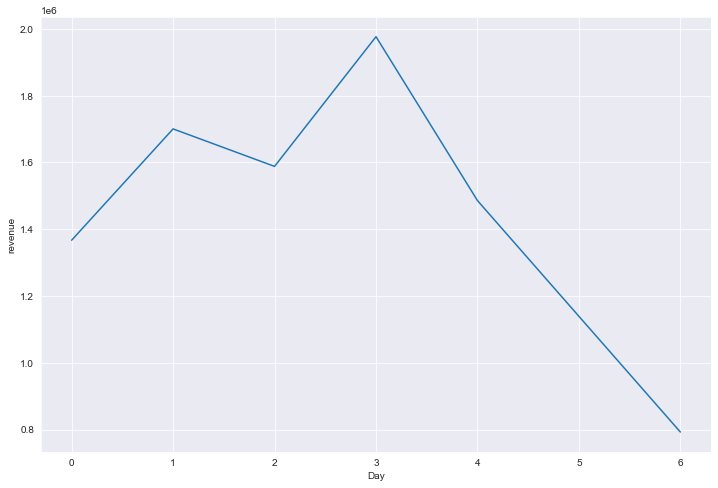

In [71]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x='Day',y='revenue',data=weekly_sales,sort=False)

#### <span style=color:red> l. Plot the skewness - All Numeric Variables</span>

In [72]:
new_data[['Quantity','UnitPrice','revenue']].skew(axis = 0, skipna = True)

Quantity     403.319431
UnitPrice    204.042413
revenue      451.465538
dtype: float64

In [73]:
new_data.skew(axis=0,skipna=True)

InvoiceNo      -0.178563
Quantity      403.319431
UnitPrice     204.042413
CustomerID      0.025776
Hour            0.189037
Year           -3.504515
Month          -0.444842
Day             0.396235
revenue       451.465538
dtype: float64

In [74]:
#revenue by month

data_revenue = new_data.groupby('Month')['revenue'].sum().reset_index()

In [75]:
data_revenue

,Month,revenue
0,1,569445.040
1,2,447137.350
2,3,595500.760
3,4,469200.361
4,5,678594.560
5,6,661213.690
6,7,600091.011
7,8,645343.900
8,9,952838.382
9,10,1039318.790


<IPython.core.display.Javascript object>

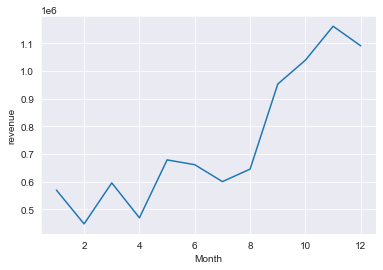

In [76]:
ax = sns.lineplot(x='Month',y='revenue',data=data_revenue,sort=False)

In [77]:
# monthly growth rate
data_revenue['MonthlyGrowth'] = data_revenue['revenue'].pct_change()

In [78]:
data_revenue

,Month,revenue,MonthlyGrowth
0,1,569445.040,NaN
1,2,447137.350,-0.214784
2,3,595500.760,0.331807
3,4,469200.361,-0.212091
4,5,678594.560,0.446279
5,6,661213.690,-0.025613
6,7,600091.011,-0.092440
7,8,645343.900,0.075410
8,9,952838.382,0.476482
9,10,1039318.790,0.090761


In [79]:
data_revenue['MonthlyGrowth'] = data_revenue['MonthlyGrowth'].fillna(0)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Monthly Growth Rate')

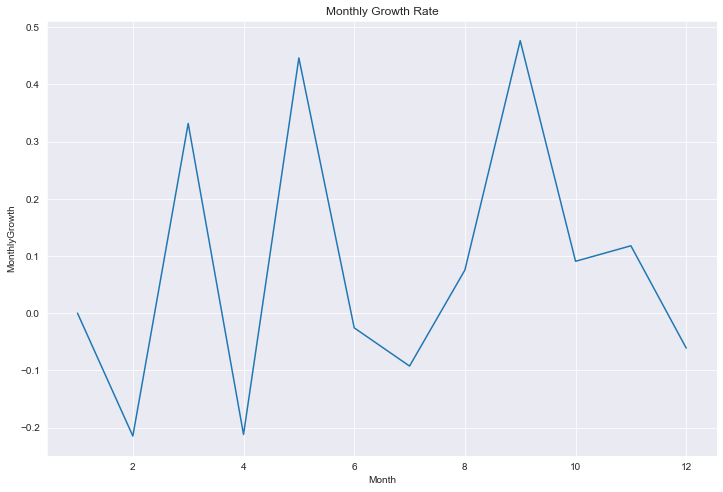

In [80]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x='Month',y='MonthlyGrowth',data=data_revenue,sort=False)
ax.set_title('Monthly Growth Rate')

In [81]:
# monthly active customers
monthly_active = new_data.groupby('Month')['CustomerID'].nunique().reset_index()
monthly_active

,Month,CustomerID
0,1,741
1,2,758
2,3,974
3,4,856
4,5,1056
5,6,991
6,7,949
7,8,935
8,9,1266
9,10,1364


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

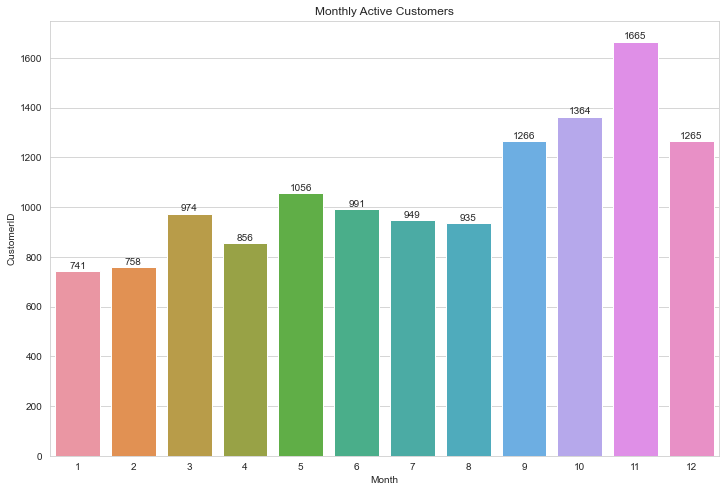

In [82]:
sns.set_style('whitegrid') 
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Month',y='CustomerID',data=monthly_active)
ax.set_title('Monthly Active Customers')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height+10,ha='center',s = '{:.0f}'.format(height))

In [83]:
cust_min_purchase_date = new_data.groupby('CustomerID').date.min().reset_index()

In [84]:
cust_min_purchase_date

,CustomerID,date
0,12346.0,2011-01-18
1,12347.0,2010-12-07
2,12348.0,2010-12-16
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4334,18280.0,2011-03-07
4335,18281.0,2011-06-12
4336,18282.0,2011-08-05
4337,18283.0,2011-01-06


In [85]:
cust_min_purchase_date.columns=['CustomerID','Minpurchasedate']

In [86]:
cust_min_purchase_date['Minpurchasemonth'] = cust_min_purchase_date['Minpurchasedate'].map(lambda date:date.month)

In [87]:
cust_min_purchase_date

,CustomerID,Minpurchasedate,Minpurchasemonth
0,12346.0,2011-01-18,1
1,12347.0,2010-12-07,12
2,12348.0,2010-12-16,12
3,12349.0,2011-11-21,11
4,12350.0,2011-02-02,2
...,...,...,...
4334,18280.0,2011-03-07,3
4335,18281.0,2011-06-12,6
4336,18282.0,2011-08-05,8
4337,18283.0,2011-01-06,1


In [88]:
new_data = pd.merge(new_data,cust_min_purchase_date, on ='CustomerID')

In [89]:
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Hour,Country,Date,date,hour,Year,Month,Day,revenue,Minpurchasedate,Minpurchasemonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,15.30,2010-12-01,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,20.34,2010-12-01,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,22.00,2010-12-01,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,20.34,2010-12-01,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,20.34,2010-12-01,12


In [90]:
new_data['usertype']='New'
new_data.loc[new_data['Month']>new_data['Minpurchasemonth'],'usertype' ]= 'Existing'

In [91]:
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Hour,Country,Date,date,hour,Year,Month,Day,revenue,Minpurchasedate,Minpurchasemonth,usertype
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,15.30,2010-12-01,12,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,20.34,2010-12-01,12,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,22.00,2010-12-01,12,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,20.34,2010-12-01,12,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,8,United Kingdom,"[2010-12-01, 08:26:00]",2010-12-01,08:26:00,2010,12,2,20.34,2010-12-01,12,New


In [92]:
usertype_revenue = new_data.groupby(['Month','usertype'])['revenue'].sum().reset_index()

In [93]:
usertype_revenue

,Month,usertype,revenue
0,1,New,569445.040
1,2,Existing,55149.910
2,2,New,391987.440
3,3,Existing,92311.410
4,3,New,503189.350
5,4,Existing,142781.210
6,4,New,326419.151
7,5,Existing,217863.280
8,5,New,460731.280
9,6,Existing,211308.130


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'revenue by usertype')

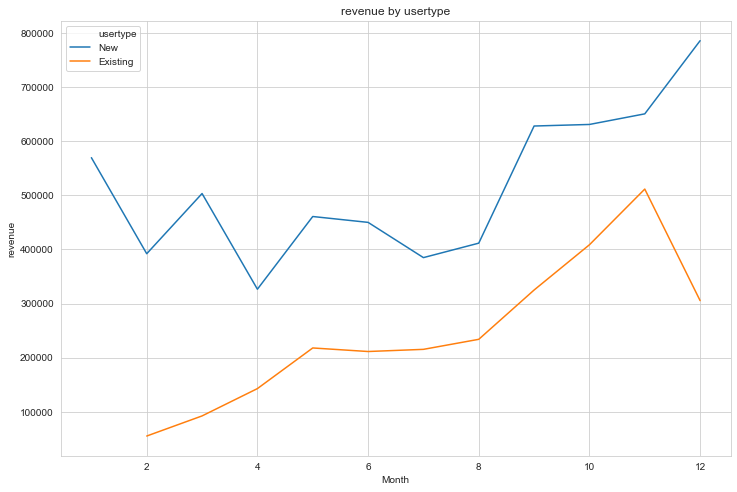

In [94]:
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.lineplot(data=usertype_revenue,x='Month',y='revenue', hue='usertype')
ax.set_title('revenue by usertype')

## <span style=color:green>Ganesh Devare : DS21JAN05</span>